In [3]:
# packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [4]:
data = pd.read_pickle('../00_Data/data_full_with_holiday.pkl')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52513 entries, 2020-12-01 00:00:00+00:00 to 2023-11-30 00:00:00+00:00
Freq: 30T
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   demand                52513 non-null  float64
 1   temp_bath             52513 non-null  float64
 2   temp_liverpool        52513 non-null  float64
 3   temp_london           52513 non-null  float64
 4   pressure_bath         52513 non-null  float64
 5   pressure_liverpool    52513 non-null  float64
 6   pressure_london       52513 non-null  float64
 7   humidity_bath         52513 non-null  float64
 8   humidity_liverpool    52513 non-null  float64
 9   humidity_london       52513 non-null  float64
 10  wind_speed_bath       52513 non-null  float64
 11  wind_speed_liverpool  52513 non-null  float64
 12  wind_speed_london     52513 non-null  float64
 13  clouds_all_bath       52513 non-null  float64
 14  clouds_all_li

In [4]:
data.head()

,demand,temp_bath,temp_liverpool,temp_london,pressure_bath,pressure_liverpool,pressure_london,humidity_bath,humidity_liverpool,humidity_london,wind_speed_bath,wind_speed_liverpool,wind_speed_london,clouds_all_bath,clouds_all_liverpool,clouds_all_london,is_holiday
2020-12-01 00:00:00+00:00,26812.0,280.700,279.15,280.21,1025.0,1024.0,1022.0,81.0,80.0,73.0,1.790,4.60,4.1,98.0,0.0,0.0,False
2020-12-01 00:30:00+00:00,26886.0,280.245,279.25,279.87,1025.0,1024.0,1022.0,81.0,79.0,74.0,2.845,4.35,4.6,97.0,0.0,0.0,False
2020-12-01 01:00:00+00:00,26473.0,279.790,279.35,279.53,1025.0,1024.0,1022.0,81.0,78.0,75.0,3.900,4.10,5.1,96.0,0.0,0.0,False
2020-12-01 01:30:00+00:00,26105.0,279.365,279.18,279.38,1025.0,1024.5,1022.5,82.0,79.0,75.0,3.790,4.10,5.4,96.5,0.0,0.0,False
2020-12-01 02:00:00+00:00,25861.0,278.940,279.01,279.23,1025.0,1025.0,1023.0,83.0,80.0,75.0,3.680,4.10,5.7,97.0,0.0,0.0,False


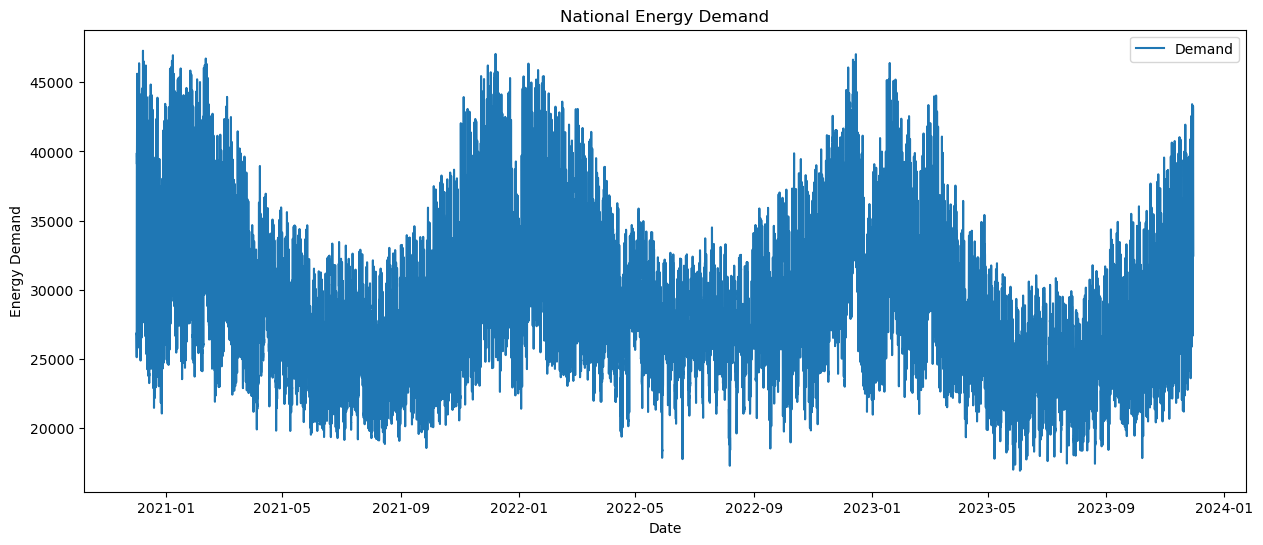

In [11]:
plt.figure(figsize=(15, 6))
plt.plot(data['demand'], label='Demand')
plt.title('National Energy Demand')
plt.xlabel('Date')
plt.ylabel('Energy Demand')
plt.legend() 
plt.show()

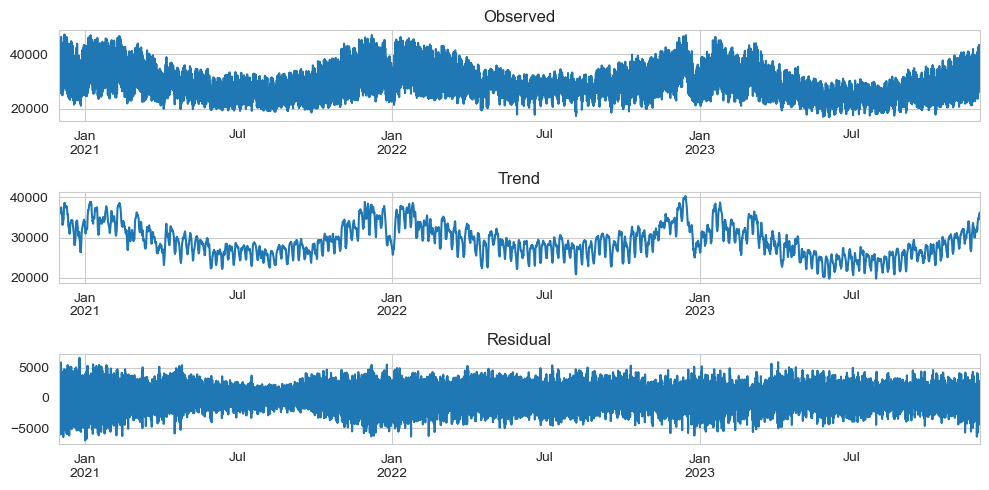

In [14]:
decomposition_daily = seasonal_decompose(data['demand'], model='additive', period=48)
decomposition_weekly = seasonal_decompose(data['demand'], model='additive', period=48*7)
decomposition_yearly = seasonal_decompose(data['demand'], model='additive', period=48*365)

# Plotting the decomposed components for the daily data
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 5))
decomposition_daily.observed.plot(ax=ax1, title='Observed')
decomposition_daily.trend.plot(ax=ax2, title='Trend')
# decomposition_daily.seasonal.plot(ax=ax3, title='Seasonality daily')
decomposition_daily.resid.plot(ax=ax3, title='Residual')

plt.tight_layout()
plt.show()

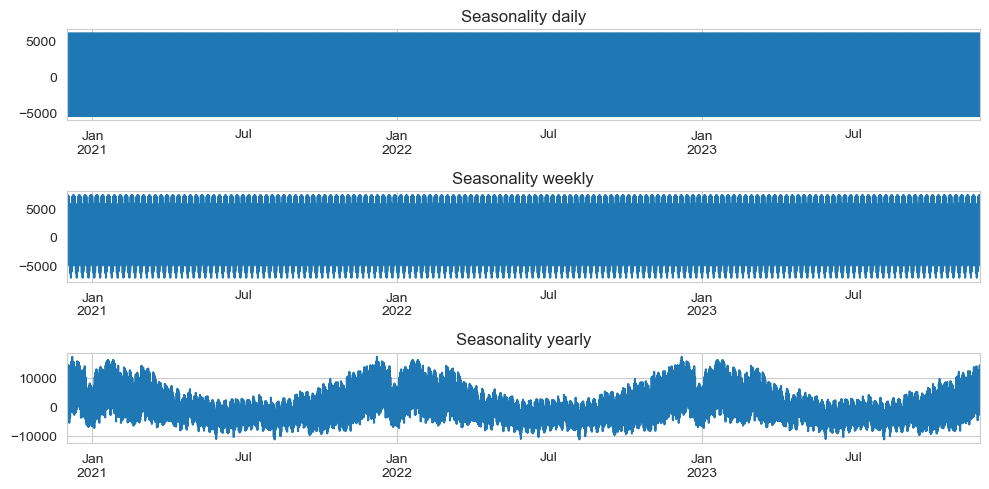

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 5))
decomposition_daily.seasonal.plot(ax=ax1, title='Seasonality daily')
decomposition_weekly.seasonal.plot(ax=ax2, title='Seasonality weekly')
decomposition_yearly.seasonal.plot(ax=ax3, title='Seasonality yearly')

plt.tight_layout()
plt.show()

Our time series is decomposed into trend, seasonal, and the remaining residuals (noise).
To account for multiple seasonalities, we decompose the data three times, with daily, weekly and yearly seasonalities.

Within the trend, we see a slightly decrease from 2020 to 2023, suggesting that the overall energy demand has a slight downward trajectory

The daily seasonality plot shows consistent peaks each year, which likely correspond to seasonal changes in energy demand, such as higher demand in winter for heating.

Weekly seasonality also shows consistent peaks.
Yearly seasonality whos a higher demand in Winter than summer.

The residual part represents the irregular part, or noise, of the data.

This shows that we have to account for multiple seasonalities in complex time series modelling.

In [22]:
# ADF-Test to determine stationarity 
adf_result = adfuller(data['demand'])

print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -10.233435
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


In [24]:
# ADF-Test to determine stationarity 
adf_result = adfuller(decomposition_daily.resid.dropna())

print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -43.017842
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


The Augmented Dickey-Fuller test tests the null hypothesis that the data has a unit root (isn't stationary). In this case, the test shows stationarity both for the demand data and the residuals. This shows we can use models that can work with stationary/assume stationary data.

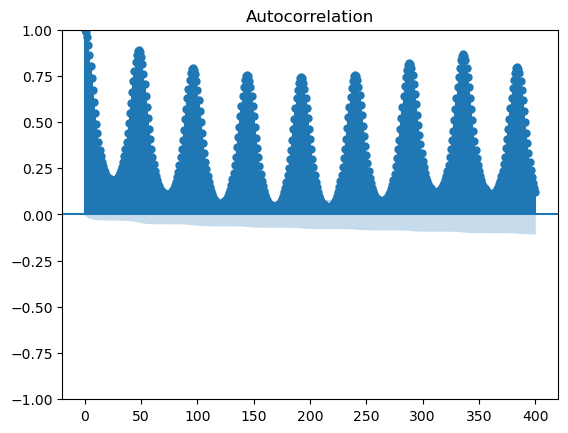

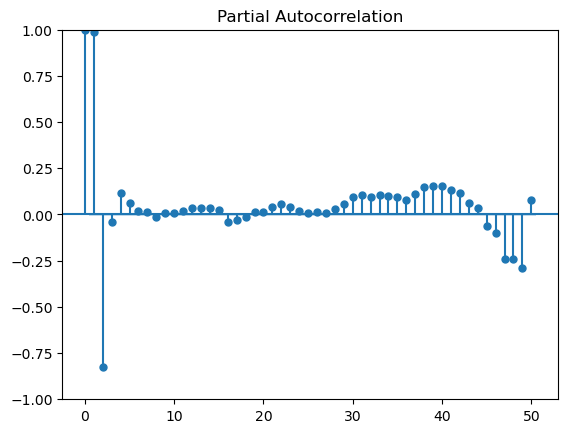

In [26]:
plot_acf(data['demand'], lags=400)
plot_pacf(data['demand'], lags=50);

Autocorrelation and partial autocorrelation show how the current values are related to past values. 

The autocorrelation plot shows a daily seasonality within the data. This is likely due to higher energy demand during the day compared to the night. As the lag increases, the seasonal effect gets smaller, which is typical for seasonal patterns.

The partial autocorrelation measures the correlation between the series and its lags that is not explained by correlations at all lower-order lags. In the PAC-plot, there is a very high positive peak at the first two lags, and a highly negative peak at the third lag. Afterwards, the effect becomes much smaller.

This implicates that we should use a model that accounts for seasonality (given the AC-plot) and autoregressive elements (given the PAC-plot). Therefore, we start with an ARIMA model.

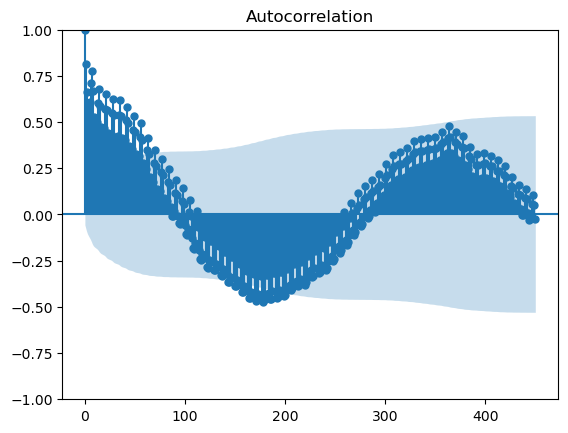

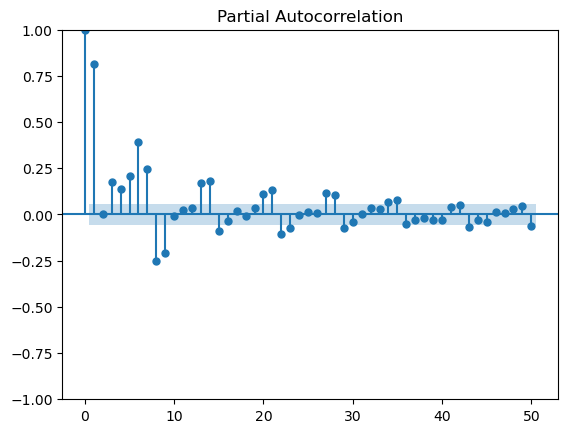

In [29]:
data_daily = data[['demand']].resample('D').sum()

plot_acf(data_daily['demand'], lags=450)
plot_pacf(data_daily['demand'], lags=50);

For daily values, we can see a high seasonality in the autocorrelation plot, which is likely caused by summer and winter demand differences. In the PAC-plot, we see high peaks in the beginning, which quickly become insignificant. 